<a href="https://colab.research.google.com/github/kiyong21c/kaggle/blob/main/20220809_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 나이브 베이즈(Naive Bayes)
 - 조건부 확률 기반 분류 모델
 - 예) '무료'라는 단어가 들어 있을 때 해당 메일이 스팸일 확률
 - 딥러닝을 제외하고 자연어 처리에 가장적합한 머신러닝 모델

# 문자 데이터셋을 이용해 스팸 여부 판단
 - 알고리즘 : 나이브 베이즈
 - 문제유형 : 분류
 - 평가지표 : 정확도, 혼돈 행렬
 - 사용모델 : MultinominalNB

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'http://media.githubusercontent.com/media/musthave-ML10/data_source/main/spam.csv'
data = pd.read_csv(file_url)

In [80]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [81]:
data['target'].unique()

array(['ham', 'spam'], dtype=object)

## 전처리 : 특수 기호 제거하기
 - 단어를 다룰 때 특수 기호는 노이즈가 됨
 - 제거할 특수 기호를 목록으로 마련 : 파이썬 내장 함수 string 활용

In [82]:
import string
string.punctuation # 특수 기호 목록 출력

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [83]:
sample_string = data['text'][0]
sample_string

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [84]:
for i in sample_string:
    if i not in string.punctuation: # 문자열을 순회하면서 특수기호가 아닌 문자만
        print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
 
c
r
a
z
y
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t


In [85]:
new_string = [] # 특수기호를 삭제한 문자열을 리스트에 담을예정
for i in sample_string:
    if i not in string.punctuation: # 문자열을 순회하면서 특수기호가 아닌 문자만
        new_string.append(i)
new_string = ''.join(new_string) # 리스트 내부의 문자열(띄워쓰기도 문자열) 합쳐서 문자열 반환(리스트X)

In [86]:
def remove_punc(x):
    new_string = []
    for i in x:
        if i not in string.punctuation:
            new_string.append(i)
    new_string = ''.join(new_string)
    return new_string

In [87]:
remove_punc(sample_string)

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [88]:
data['text'] # 시리즈의 각 행에 apply(func)함수 적용

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                 Will ü b going to esplanade fr home?
5571    Pity, * was in mood for that. So...any other s...
5572    The guy did some bitching but I acted like i'd...
5573                           Rofl. Its true to its name
Name: text, Length: 5574, dtype: object

In [89]:
data['text'].apply(remove_punc)

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                  Will ü b going to esplanade fr home
5571    Pity  was in mood for that Soany other suggest...
5572    The guy did some bitching but I acted like id ...
5573                            Rofl Its true to its name
Name: text, Length: 5574, dtype: object

In [90]:
data['text'] = data['text'].apply(remove_punc)

## 전처리 : 불용어 제거하기
 - 불용어는 자연어 분석에 큰 도움이 안됨
 - 제거하여 데이터를 가볍게
 - 자연어 처리에서는 각 단어가 하나의 독립변수이므로 데이터를 방대하게 펼치게 됨

 - nltk라이브러리에서 제공되는 불용어 목록 사용

In [91]:
import nltk
nltk.download('stopwords') # 불용어 목록 가져오기

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [92]:
from nltk.corpus import stopwords

In [93]:
stopwords.words('english') # 영어 불용어 선택(한국어 불용어는 제공되지 않음)
# 한국어 불용어 : http://www.ranks.nl/stopwords/korean 또는 별도의 리스트 형태로 만들어서 지정

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

 - 불용어가 모두 소문자로 되어있음 유의

In [94]:
stopwords.fileids() # 제공되는 불용어 언어 목록

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [95]:
sample_string = data['text'][0]
sample_string.split() # 단어 단위로 문장 분할

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [96]:
for i in sample_string.split():
    if i not in stopwords.words('english'): # 불용어가 아니면
        print(i)

Go
jurong
point
crazy
Available
bugis
n
great
world
la
e
buffet
Cine
got
amore
wat


 - 불용어가 아닌지 정확하게 확인하려면 소문자로 변환하여 확인한다

In [97]:
for i in sample_string.split():
    if i.lower() not in stopwords.words('english'):
        print(i.lower())

go
jurong
point
crazy
available
bugis
n
great
world
la
e
buffet
cine
got
amore
wat


 - 불용어를 제외하고 각 단어를 문장으로 다시 합치자

In [98]:
new_string = []
for i in sample_string.split():
    if i.lower() not in stopwords.words('english'):
        new_string.append(i.lower()) # 소문자로 변환된 채로 리스트에 추가
new_string = ' '.join(new_string) # 공백 단위로 묶기
new_string

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

 - join() 앞 따옴표 사이에 공란
 - 특수 기호를 제거할 떄는 빈칸 없었던 이유 : 문자 하나씩(띄워쓰기도 문자)을 모아서 문장처럼 이어 붙였기 떄문
 - 지금은 단어 단위로 모아졌기 때문에(띄워쓰기는 없어졌음) 단어 사이의 빈칸을 만들어 준다

In [99]:
def stop_words(x):
    new_string = []
    for i in x.split():
        if i.lower() not in stopwords.words('english'):
            new_string.append(i.lower())
    new_string = ' '.join(new_string)
    return new_string

In [100]:
data['text'] = data['text'].apply(stop_words)
data['text']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5569    2nd time tried 2 contact u u £750 pound prize ...
5570                          ü b going esplanade fr home
5571                          pity mood soany suggestions
5572    guy bitching acted like id interested buying s...
5573                                       rofl true name
Name: text, Length: 5574, dtype: object

## 전처리 : 목표 컬럼 형태 변경(문자 → 숫자)


```
# apply() → Pandas의 DataFrames/Series객체 모두에 적용
# map() → Pandas의 Series객체에만 적용
    1. 딕셔너리 타입의 데이터를 매칭되는 값으로 불러오도록 사용
    2. apply(func) 처럼 다른 함수를 적용 할 수 있음
```



In [101]:
data['target'] = data['target'].map({'spam':1, 'ham':0})
data['target']

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: target, Length: 5574, dtype: int64

 - 카운트 기반 벡터화

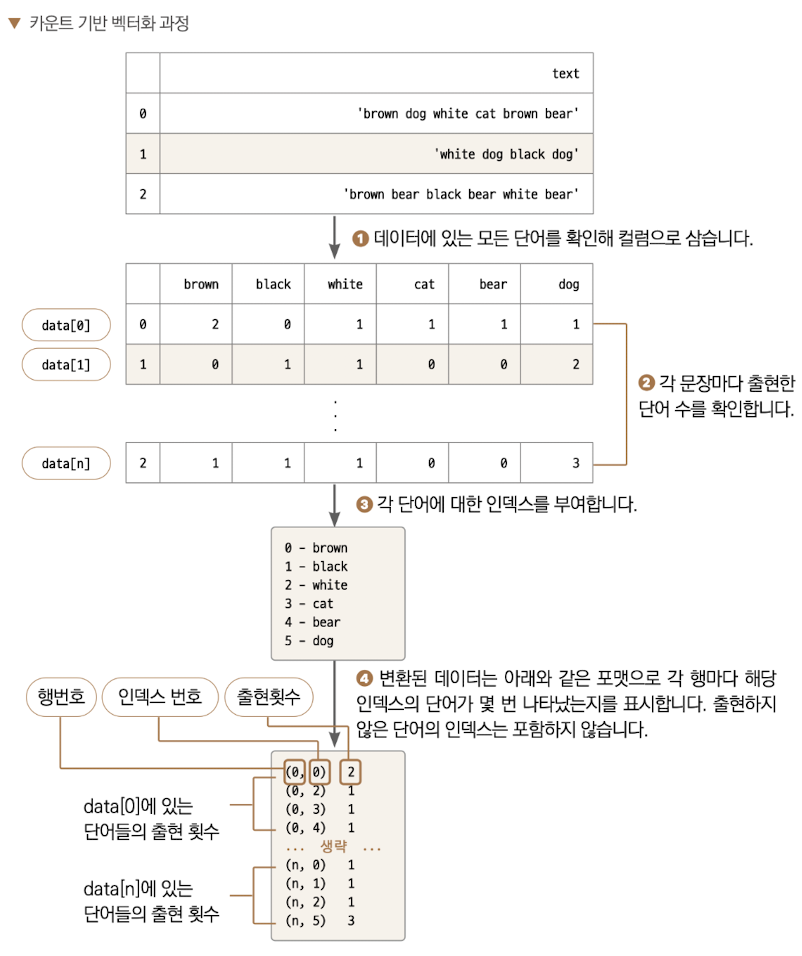

In [102]:
x = data['text'] # 독립변수
y = data['target'] # 종속변수

In [103]:
# 카운트기반벡터화 모듈
from sklearn.feature_extraction.text import CountVectorizer

In [104]:
cv = CountVectorizer()
cv.fit(x) # 학습 및 학습결과를 cv객체(모델)에 저장
cv.vocabulary_ # 학습된 단어와 단어의 인덱스 출력

{'go': 3791,
 'jurong': 4687,
 'point': 6433,
 'crazy': 2497,
 'available': 1414,
 'bugis': 1881,
 'great': 3888,
 'world': 9184,
 'la': 4847,
 'buffet': 1879,
 'cine': 2214,
 'got': 3848,
 'amore': 1181,
 'wat': 8947,
 'ok': 5995,
 'lar': 4886,
 'joking': 4655,
 'wif': 9079,
 'oni': 6027,
 'free': 3577,
 'entry': 3160,
 'wkly': 9136,
 'comp': 2330,
 'win': 9093,
 'fa': 3296,
 'cup': 2553,
 'final': 3421,
 'tkts': 8380,
 '21st': 454,
 'may': 5335,
 '2005': 441,
 'text': 8217,
 '87121': 875,
 'receive': 6833,
 'questionstd': 6724,
 'txt': 8592,
 'ratetcs': 6776,
 'apply': 1267,
 '08452810075over18s': 71,
 'dun': 3011,
 'say': 7192,
 'early': 3031,
 'hor': 4222,
 'already': 1154,
 'nah': 5682,
 'dont': 2918,
 'think': 8291,
 'goes': 3805,
 'usf': 8741,
 'lives': 5050,
 'around': 1318,
 'though': 8310,
 'freemsg': 3585,
 'hey': 4118,
 'darling': 2617,
 'weeks': 9002,
 'word': 9170,
 'back': 1464,
 'id': 4343,
 'like': 5000,
 'fun': 3652,
 'still': 7860,
 'tb': 8147,
 'xxx': 9309,
 'std': 

In [105]:
x = cv.transform(x)
print(x)

  (0, 1181)	1
  (0, 1414)	1
  (0, 1879)	1
  (0, 1881)	1
  (0, 2214)	1
  (0, 2497)	1
  (0, 3791)	1
  (0, 3848)	1
  (0, 3888)	1
  (0, 4687)	1
  (0, 4847)	1
  (0, 6433)	1
  (0, 8947)	1
  (0, 9184)	1
  (1, 4655)	1
  (1, 4886)	1
  (1, 5995)	1
  (1, 6027)	1
  (1, 9079)	1
  (2, 71)	1
  (2, 441)	1
  (2, 454)	1
  (2, 875)	1
  (2, 1267)	1
  (2, 2330)	1
  :	:
  (5570, 3188)	1
  (5570, 3564)	1
  (5570, 3810)	1
  (5570, 4188)	1
  (5571, 5566)	1
  (5571, 6359)	1
  (5571, 7611)	1
  (5571, 7986)	1
  (5572, 999)	1
  (5572, 1665)	1
  (5572, 1916)	1
  (5572, 3103)	1
  (5572, 3577)	1
  (5572, 3701)	1
  (5572, 3950)	1
  (5572, 4343)	1
  (5572, 4480)	1
  (5572, 5000)	1
  (5572, 5777)	1
  (5572, 7636)	1
  (5572, 8731)	1
  (5572, 8997)	1
  (5573, 5688)	1
  (5573, 7052)	1
  (5573, 8538)	1


 - (0, 1181) 1
 - (데이터의 행 번호, 단어의 인덱스 값), 행에서 출현 횟수

## 모델링 및 예측/평가하기

In [108]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [110]:
from sklearn.naive_bayes import MultinomialNB

In [111]:
model = MultinomialNB()
model.fit(x_train, y_train)
pred = model.predict(x_test)

 - 예측 결과에 대한 평가를 accuracy와 함께, confusion_matrix 모듈 사용

  > confusion_matrix 모듈 : 실제값과 예측값을 비교하여 매트릭스 형태로 표현

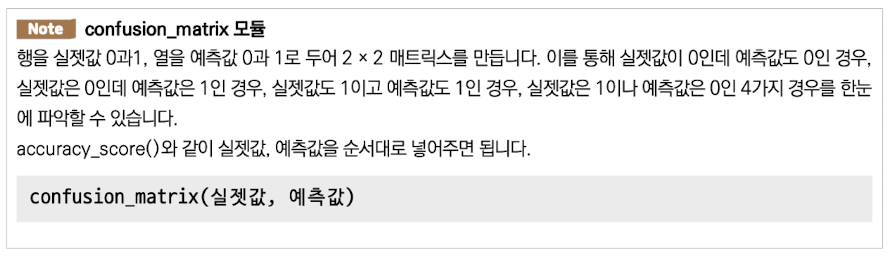

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [113]:
accuracy_score(y_test, pred)

0.9856502242152466

In [114]:
confusion_matrix(y_test, pred)

array([[965,  12],
       [  4, 134]])

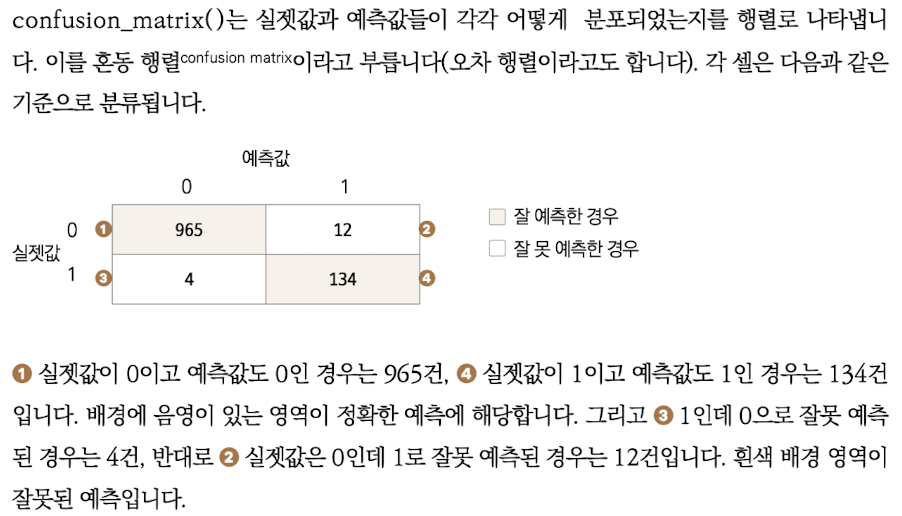

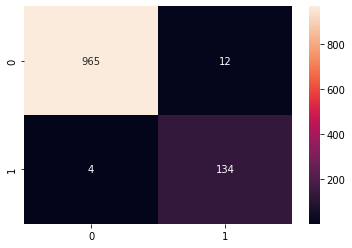

In [116]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.0f') # 소숫점0자리 즉, 정수로표기
# sns.heatmap(df.corr()) # DataFrame에 대한 상관관계 : 데이터프레임형식
# sns.heatmap(array()) # 혼동행렬 : 2차원 array형식

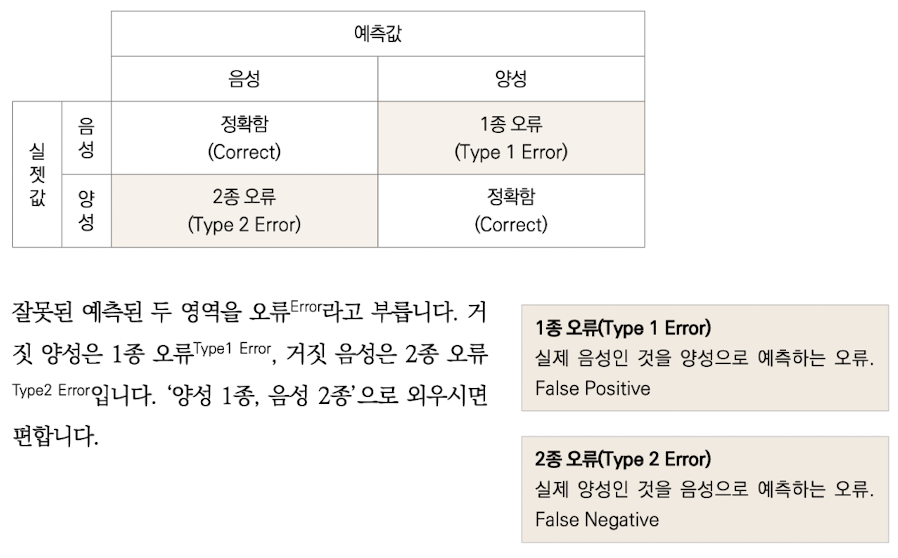

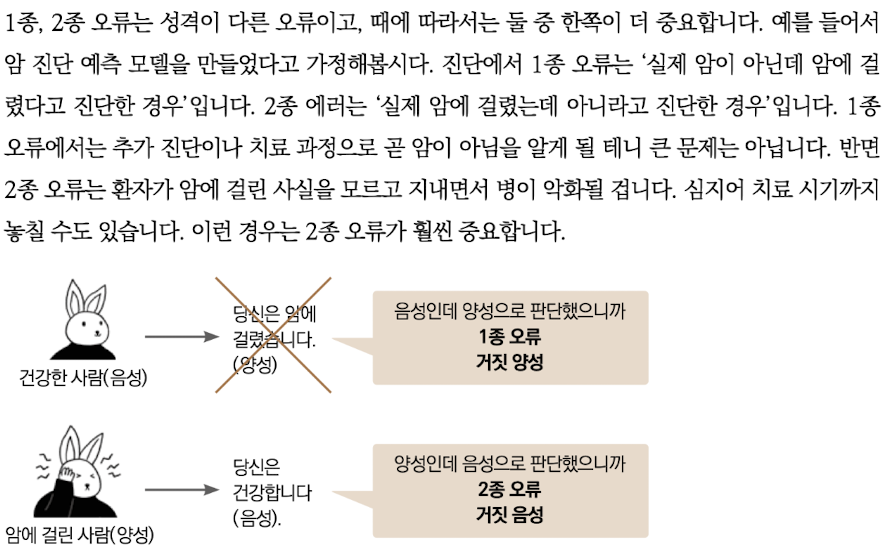

## 이해하기 : 나이브 베이즈 모델

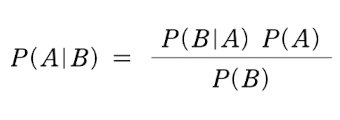

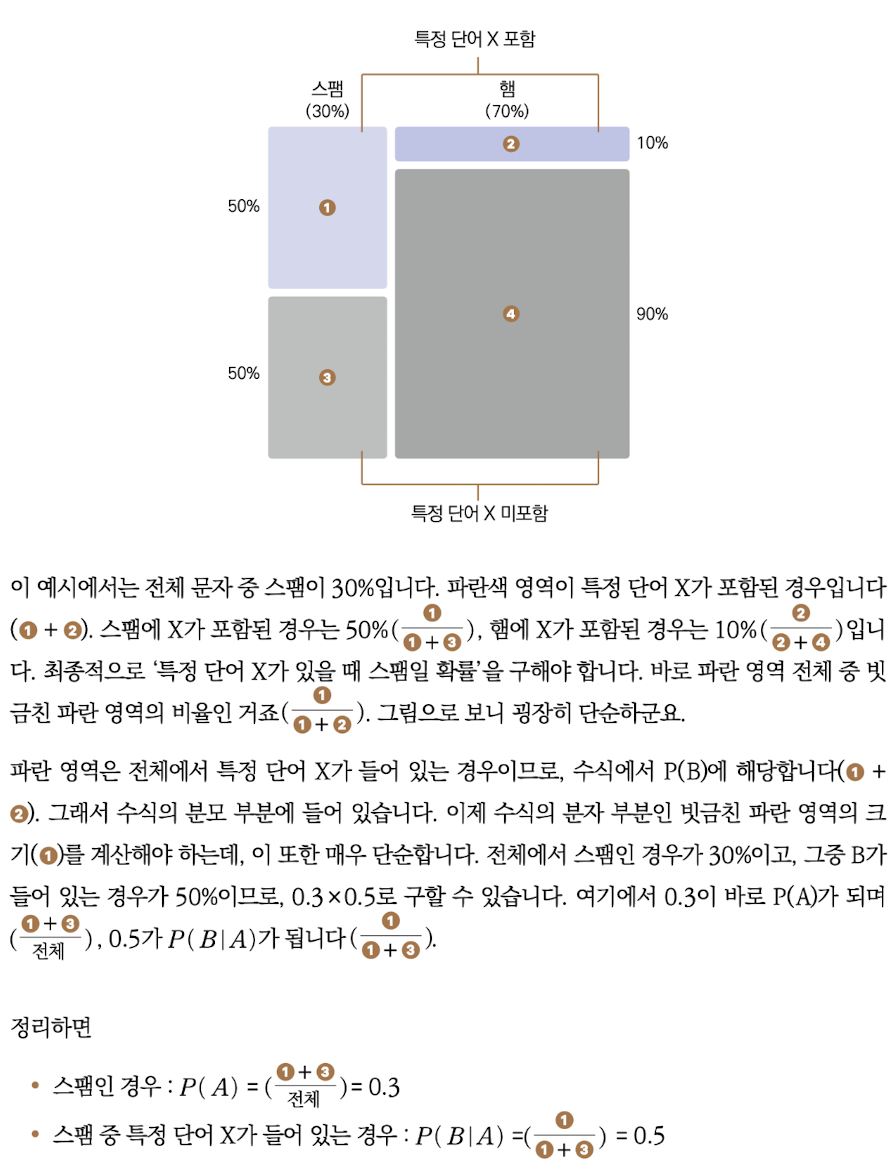

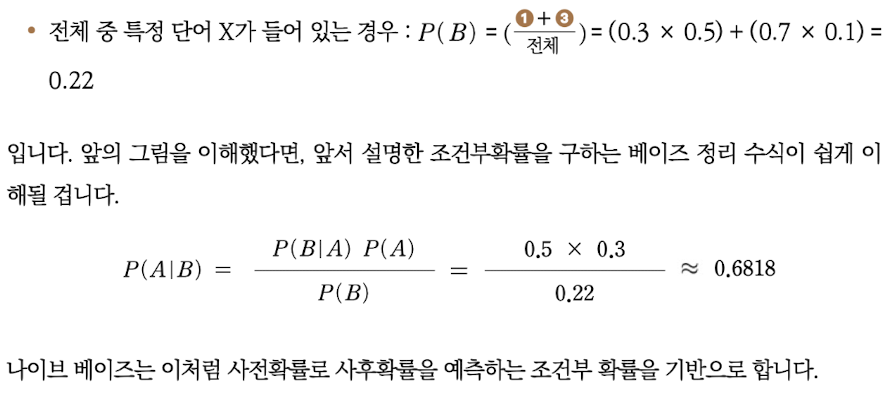